# IC 4.10 Part 3_Additional Visualizations

# Table of Contents
##### 1. Import Libraries and Data
##### 2. Visualizations
    2.1 Busiest day of the week
    2.2 Busiest hours of the day
    2.3 Time of day customers buy the highest priced items
    2.4 Distribution of users according to brand loyalty
        2.4.1 Bar chart
        2.4.2 Pie chart
    2.5 Ordering habits based on loyalty status
    2.6 Differences in ordering habits by region
        2.6.1 Relationship between average total expenditure and income group by region
        2.6.2 Relationship between average total expenditure and age group by region
        2.6.3 Relationship between average total expenditure and dependents by region
    2.7 Differences in expenditure for various groups
        2.7.1 Total expenditure per age group
        2.7.2 Total expenditure per department for each age group
        2.7.3 Total expenditure per department for each income group
        2.7.4 Total expenditure by family status
        2.7.5 Total expenditure per department for each family status
    2.8 Ordering Habits for Customer Profiles
        2.8.1 Average order price by customer profile
        2.8.2 Top products ordered by each customer profile
        2.8.3 Preferred order times and days of the week by each customer profile
        2.8.4 Loyalty statuses for each customer profile
##### 3. Export Data

## 1. Import Libraries and Data

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import scipy

In [4]:
# Create path
path = r'C:\Users\ashle\Documents\07-2024 Instacart Basket Analysis'

# Import data
instacart = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'secured_with_exclusion.pkl'))

## 2. Visualizations

### 2.1 Busiest day of the week

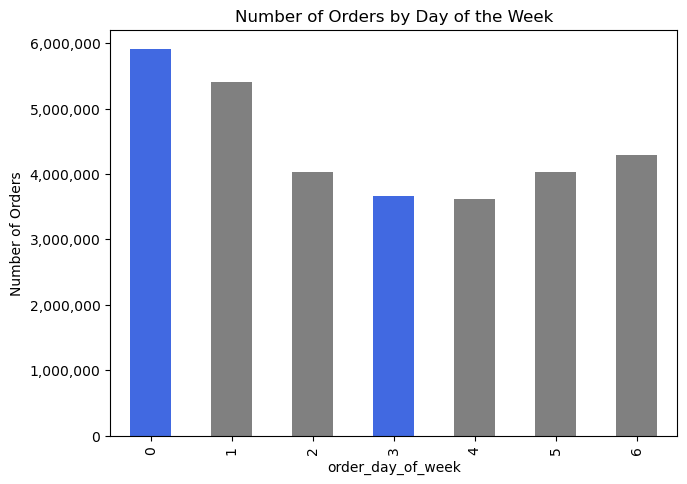

In [8]:
# Create a bar chart showing busiest days of the week

plt.title('Number of Orders by Day of the Week')
plt.xticks(rotation=0)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to fit labels
plt.xlabel('Day of Week')

def value_formatter(x, pos):
    return f'{x:,.0f}'
plt.ylabel('Number of Orders')
plt.gca().yaxis.set_major_formatter(FuncFormatter(value_formatter))

bar_order_day = instacart['order_day_of_week'].value_counts().sort_index().plot.bar(color =['royalblue', 'grey', 'grey', 'royalblue', 'grey', 'grey', 'grey'])

bar_busiest_days_of_week = plt.gcf()

In [10]:
# Export chart
bar_busiest_days_of_week.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_busiest_days_of_week.png'), dpi=300, bbox_inches='tight')

### 2.2 Busiest hours of the day

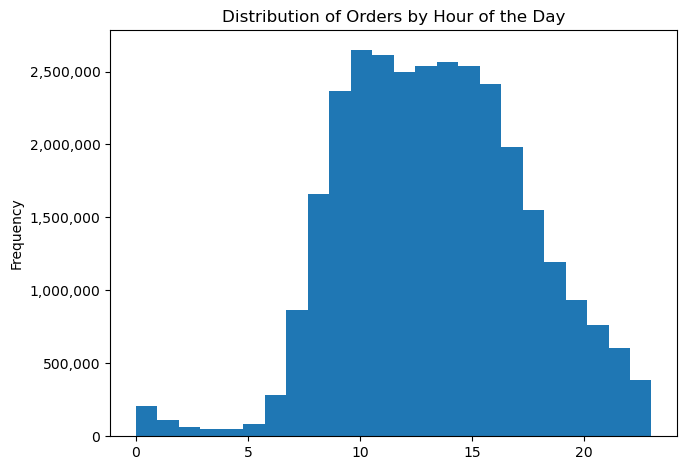

In [12]:
# Create a histogram showing the distribution of sales by order hour of the day

# Set formatting
plt.title('Distribution of Orders by Hour of the Day')
plt.tight_layout()  # Adjust layout to fit labels
plt.xlabel('Hour of Day')
def value_formatter(x, pos):
    return f'{x:,.0f}'
plt.ylabel('Number of Orders')
plt.gca().yaxis.set_major_formatter(FuncFormatter(value_formatter))

# Plot chart
hist_busiest_hour_of_day = instacart['order_hour_of_day'].plot.hist(bins = 24)

hist_busiest_hour_of_day = plt.gcf()

# Display the plot
plt.show()

In [14]:
# Export chart
hist_busiest_hour_of_day.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_busiest_hour_of_day.png'), dpi=300, bbox_inches='tight')

### 2.3 Time of day customers buy the highest priced items

In [16]:
# Create a representative sample to use in a line plot. 

np.random.seed(4)

# Create a list holding True/False values to the test np.random.rand() <= 0.7
dev = np.random.rand(len(instacart)) <= 0.7

# Store 70% of the sample in the dataframe big
big = instacart[dev]

# Store 30% of the sample in the dataframe small
small = instacart[~dev]

In [17]:
# Confirm successful split
len(instacart)

30964564

In [18]:
len(big) + len(small)

30964564

In [19]:
# Create dataframe containing 'order_hour"of_day' and 'prices' columns
instacart_sample = small[['order_hour_of_day', 'prices']]

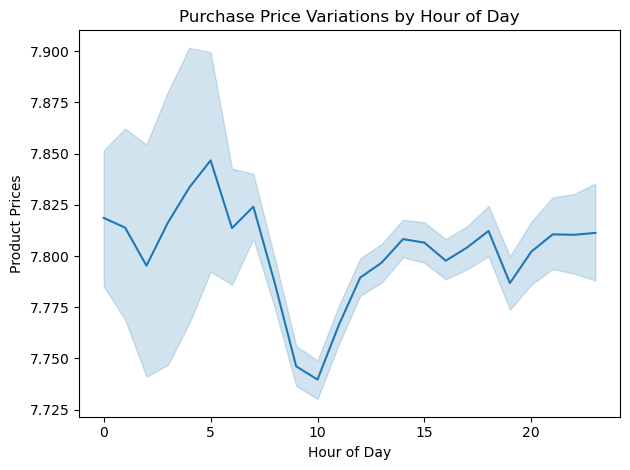

In [20]:
# Create line chart showing prices by order_hour_of_day.
line_prices_order_hour = sns.lineplot(data = instacart_sample, x = 'order_hour_of_day', y = 'prices')

plt.xlabel('Hour of Day')
plt.ylabel('Product Prices')
plt.title('Purchase Price Variations by Hour of Day')
plt.tight_layout()

line_prices_order_hour = plt.gcf()

# Display the plot
plt.show()

In [21]:
# Export chart
line_prices_order_hour.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_prices_order_hour.png'), dpi=300, bbox_inches='tight')

### 2.4 Distribution of users according to brand loyalty

#### 2.4.1 Bar chart

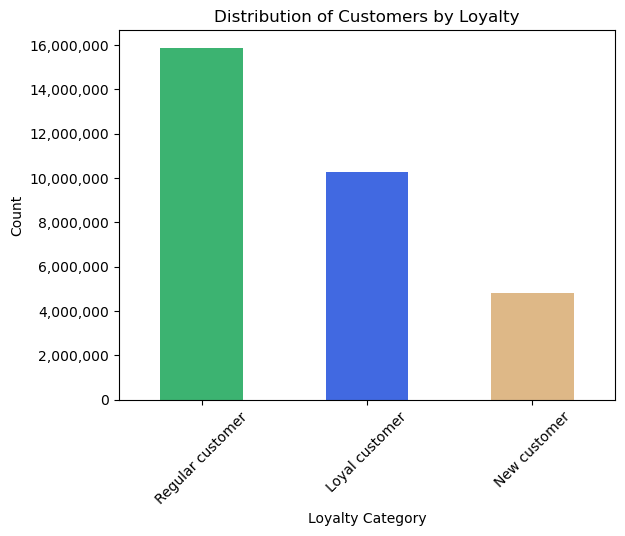

In [22]:
# Create bar chart on 'loyalty_flag' frequency

# Plot chart
bar_loyalty = instacart['loyalty_flag'].value_counts().plot.bar(color = ['mediumseagreen', 'royalblue', 'burlywood'])

# Set formatting
plt.title('Distribution of Customers by Loyalty')
plt.ylabel('Count')
def value_formatter(x, pos):
    return f'{x:,.0f}'
plt.gca().yaxis.set_major_formatter(FuncFormatter(value_formatter))
plt.xlabel('Loyalty Category')
plt.xticks(rotation=45)

bar_loyalty = plt.gcf()

In [27]:
# Export chart
bar_loyalty.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty.png'), dpi=300, bbox_inches='tight')

#### 2.4.2 Pie chart

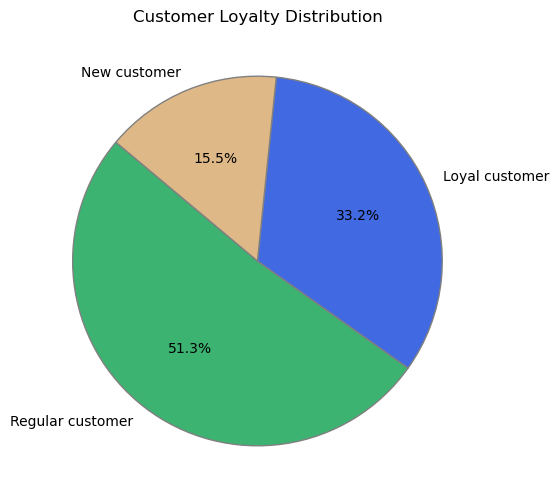

In [28]:
### Create pie chart on loyalty_flag

# Frequency of each loyalty category
loyalty_counts = instacart['loyalty_flag'].value_counts()

# Color parameters and wedge properties
colors = ('mediumseagreen', 'royalblue', 'burlywood')
wp = {'linewidth': 1, 'edgecolor': 'grey'}

# Creating plot
fig,ax = plt.subplots(figsize = (8, 6))
ax.pie(loyalty_counts, labels=loyalty_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops=wp)

#Set title
ax.set_title('Customer Loyalty Distribution')

pie_loyalty = plt.gcf()

In [29]:
# Export chart
pie_loyalty.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_loyalty.png'), dpi=300, bbox_inches='tight')

### 2.5 Ordering habits based on loyalty status

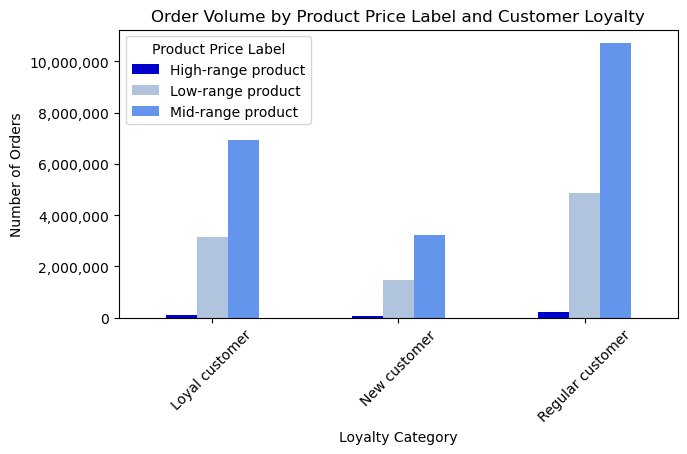

In [30]:
## Frequency of low-range, mid-range, or high-range product purchases by loyalty status. 

# Create a dataframe that contains the counts for each price_label for each loyalty group
grouped_data = instacart.groupby(['loyalty_flag', 'price_label']).size().unstack(fill_value=0)

# Custom colors
colors = ['mediumblue', 'lightsteelblue', 'cornflowerblue']

# Plot the grouped bar chart
grouped_data.plot(kind='bar', stacked=False, color=colors)
plt.title('Order Volume by Product Price Label and Customer Loyalty')
plt.xlabel('Loyalty Category')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.legend(title='Product Price Label')
plt.tight_layout()
def value_formatter(x, pos):
    return f'{x:,.0f}'
    
plt.gca().yaxis.set_major_formatter(FuncFormatter(value_formatter))

product_price_range_by_loyalty = plt.gcf()

In [31]:
# Export chart
product_price_range_by_loyalty.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'product_price_range_by_loyalty.png'), dpi=300, bbox_inches='tight')

### 2.6 Differences in ordering habits by region

#### 2.6.1 Relationship between average total expenditure and income group by region

Steps: 
1. Group data by region and income_group_flag
2. Calculate the average total expenditure for each combination of region and income group.
3. Pivot the data so that regions are rows, income groups are columns, and the values are average order values.
4. Create a heatmap to visualize the relationship

In [32]:
# Group by region and income group, calculate the average total expenditure
avg_expediture_by_region_income = instacart.groupby(['region', 'income_group'])['total_expenditure'].mean().reset_index()

In [33]:
avg_expediture_by_region_income

,region,income_group,total_expenditure
0,Midwest,High income,3517.841330
1,Midwest,Low income,2423.325168
2,Midwest,Middle income,3420.628541
3,Northeast,High income,3554.915071
4,Northeast,Low income,2422.447251
5,Northeast,Middle income,3567.341850
6,South,High income,3498.403823
7,South,Low income,2652.506098
8,South,Middle income,3544.490526
9,West,High income,3543.981915


In [34]:
# Pivot the data for heatmap visualization
pivot_data = avg_expediture_by_region_income.pivot(index='region', columns='income_group', values='total_expenditure')

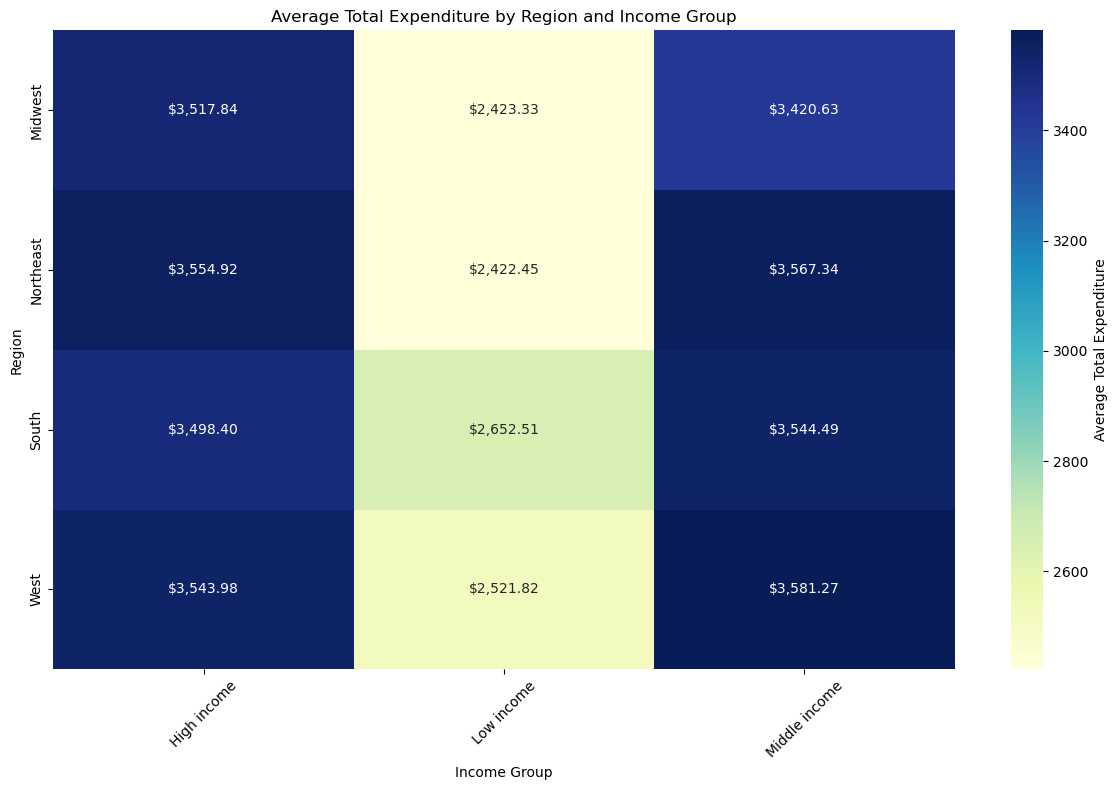

In [35]:
# Set custom value formatting
def fmt_dollar_comma(x):
    return f'${x:,.2f}'

# Create heatmap
plt.figure(figsize=(12, 8))
ax = sns.heatmap(pivot_data, annot=True, cmap='YlGnBu', fmt='.2f', annot_kws={"size": 10})
plt.title('Average Total Expenditure by Region and Income Group')
plt.xlabel('Income Group')
plt.ylabel('Region')
plt.xticks(rotation=45)

# Adjust the colorbar
cbar = plt.gca().collections[0].colorbar
cbar.set_label('Average Total Expenditure')

# Apply the custom formatting to the values
for text in ax.texts:
    value = float(text.get_text())
    text.set_text(fmt_dollar_comma(value))

plt.tight_layout()

heatmap_avg_expediture_region_income = plt.gcf()

This heat map shows that high and middle income groups tend to spend more than low income groups across all regions. The low-income customers in the South have a noticable slightly higher average expediture compared to other regions. 

In [36]:
# Export chart
heatmap_avg_expediture_region_income.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'heatmap_avg_expediture_region_income.png'), dpi=300, bbox_inches='tight')

#### 2.6.2 Relationship between average total expenditure and age group by region

Steps: 
1. Group data by region and age_group
2. Calculate the average total expenditure for each combination of region and age group.
3. Pivot the data so that regions are rows, age groups are columns, and the values are average order values.
4. Create a heatmap to visualize the relationship

In [38]:
# Group by region and age group, calculate the average total expenditure
avg_expediture_by_region_age = instacart.groupby(['region', 'age_group'])['total_expenditure'].mean().reset_index()

In [39]:
avg_expediture_by_region_age

,region,age_group,total_expenditure
0,Midwest,Adult,3414.386432
1,Midwest,Older adult,3386.596358
2,Midwest,Senior,3288.504956
3,Midwest,Young adult,3284.823661
4,Northeast,Adult,3347.786310
5,Northeast,Older adult,3396.570425
6,Northeast,Senior,3533.885112
7,Northeast,Young adult,3575.366131
8,South,Adult,3447.361981
9,South,Older adult,3404.539897


In [40]:
# Pivot the data for heatmap visualization
pivot_data_age = avg_expediture_by_region_age.pivot(index='region', columns='age_group', values='total_expenditure')

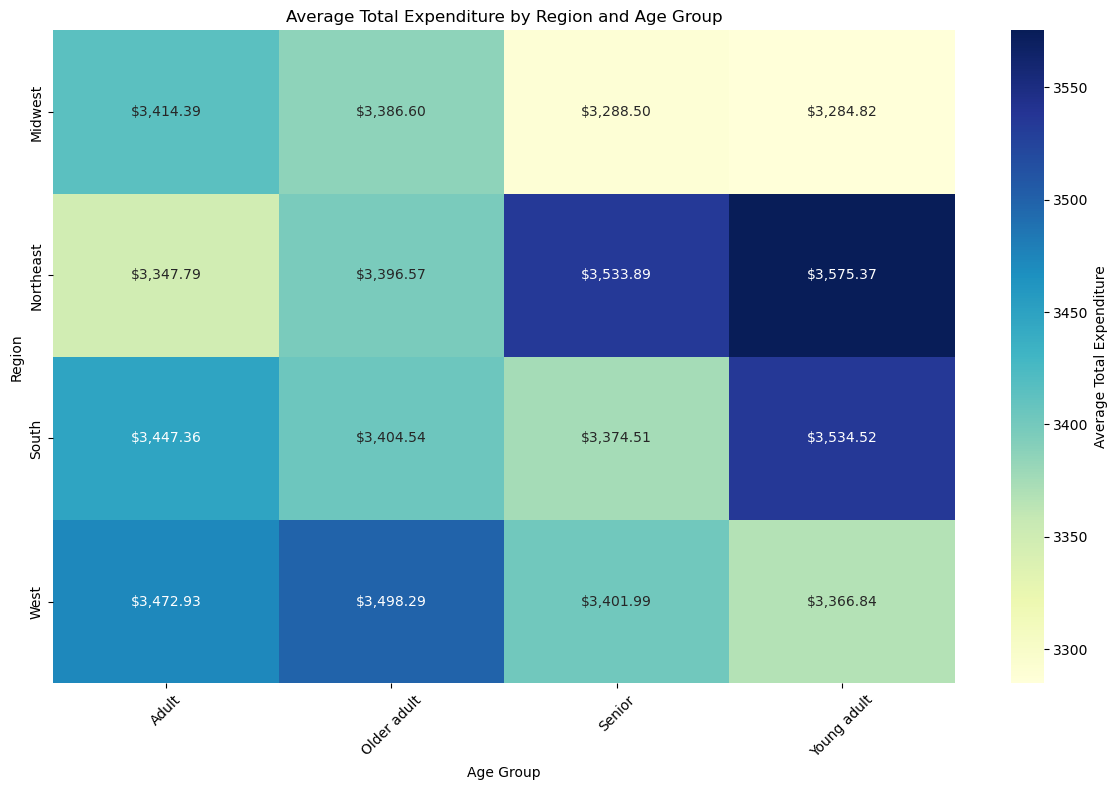

In [41]:
# Set custom value formatting
def fmt_dollar_comma(x):
    return f'${x:,.2f}'

# Create heatmap
plt.figure(figsize=(12, 8))
ax = sns.heatmap(pivot_data_age, annot=True, cmap='YlGnBu', fmt='.2f', annot_kws={"size": 10})
plt.title('Average Total Expenditure by Region and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Region')
plt.xticks(rotation=45)

# Adjust the colorbar
cbar = plt.gca().collections[0].colorbar
cbar.set_label('Average Total Expenditure')

# Apply the custom formatting to the values
for text in ax.texts:
    value = float(text.get_text())
    text.set_text(fmt_dollar_comma(value))

plt.tight_layout()

heatmap_avg_expediture_region_age = plt.gcf()

The average total expediture for each age group/region is very close, with a difference of roughly $300. 			
The highest expediture is with the young adults in the Northeast region. This is followed by young adults in the South as well as senior in the Northeast.				
The Midwest region shows lower average expeditures in most age groups compared to other regions.			


In [42]:
# Export chart
heatmap_avg_expediture_region_age.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'heatmap_avg_expediture_region_age.png'), dpi=300, bbox_inches='tight')

#### 2.6.3 Relationship between average total expenditure and dependents by region

Steps: 
1. Group data by region and dependents_flag
2. Calculate the average total expenditure for each combination of region and dependents group.
3. Pivot the data so that regions are rows, dependents groups are columns, and the values are average order values.
4. Create a heatmap to visualize the relationship

In [43]:
# Group by region and dependents group, calculate the average total expenditure
avg_expediture_by_region_dependents = instacart.groupby(['region', 'dependents_flag'])['total_expenditure'].mean().reset_index()

In [44]:
avg_expediture_by_region_dependents

,region,dependents_flag,total_expenditure
0,Midwest,Has dependents,3334.804944
1,Midwest,No dependents,3429.214478
2,Northeast,Has dependents,3489.860498
3,Northeast,No dependents,3283.087289
4,South,Has dependents,3403.670625
5,South,No dependents,3488.069133
6,West,Has dependents,3451.654560
7,West,No dependents,3447.970137


In [45]:
# Pivot the data for heatmap visualization
pivot_data_dependents = avg_expediture_by_region_dependents.pivot(index='region', columns='dependents_flag', values='total_expenditure')

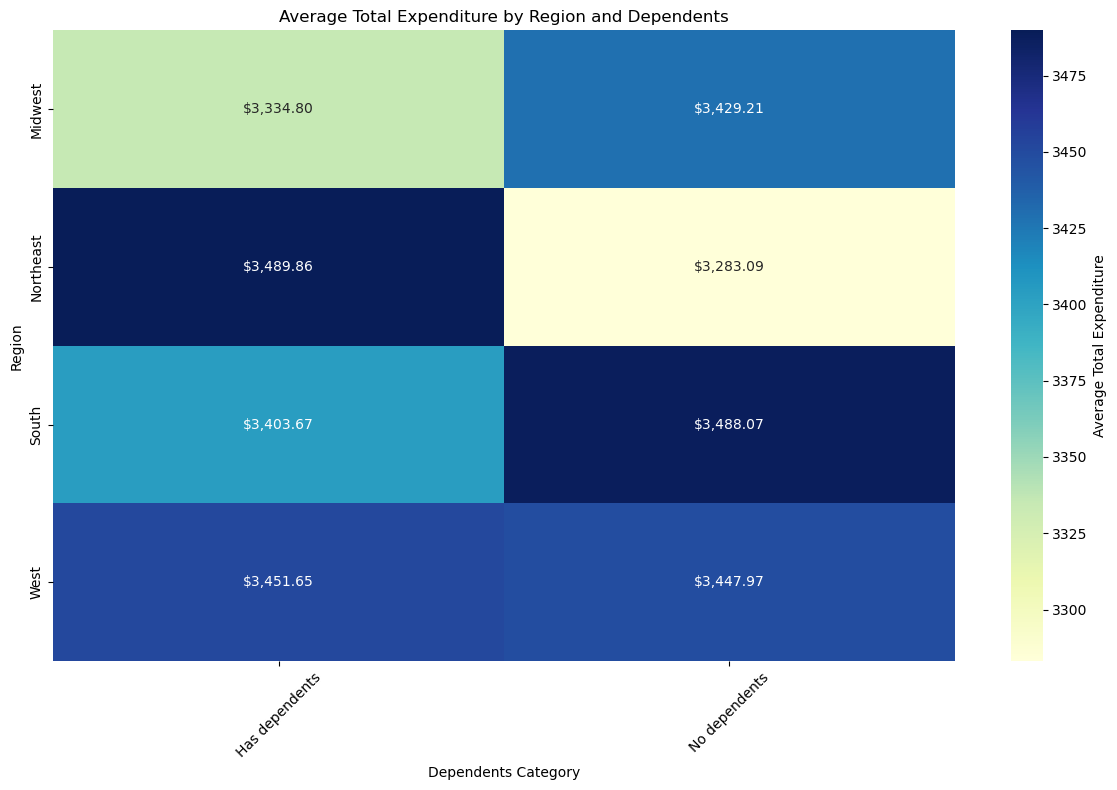

In [46]:
# Set custom value formatting
def fmt_dollar_comma(x):
    return f'${x:,.2f}'

# Create heatmap
plt.figure(figsize=(12, 8))
ax = sns.heatmap(pivot_data_dependents, annot=True, cmap='YlGnBu', fmt='.2f', annot_kws={"size": 10})
plt.title('Average Total Expenditure by Region and Dependents')
plt.xlabel('Dependents Category')
plt.ylabel('Region')
plt.xticks(rotation=45)

# Adjust the colorbar
cbar = plt.gca().collections[0].colorbar
cbar.set_label('Average Total Expenditure')

# Apply the custom formatting to the values
for text in ax.texts:
    value = float(text.get_text())
    text.set_text(fmt_dollar_comma(value))

plt.tight_layout()

heatmap_avg_expediture_region_dependents = plt.gcf()

In [47]:
# Export chart
heatmap_avg_expediture_region_dependents.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'heatmap_avg_expediture_region_dependents.png'), dpi=300, bbox_inches='tight')

### 2.7 Differences in expenditure for various groups

#### 2.7.1 Total expenditure per age group

In [48]:
total_expenditure_age_group = instacart.groupby('age_group')['total_expenditure'].sum().reset_index()

In [49]:
total_expenditure_age_group

,age_group,total_expenditure
0,Adult,3.313508e+10
1,Older adult,3.317101e+10
2,Senior,2.778648e+10
3,Young adult,1.175455e+10


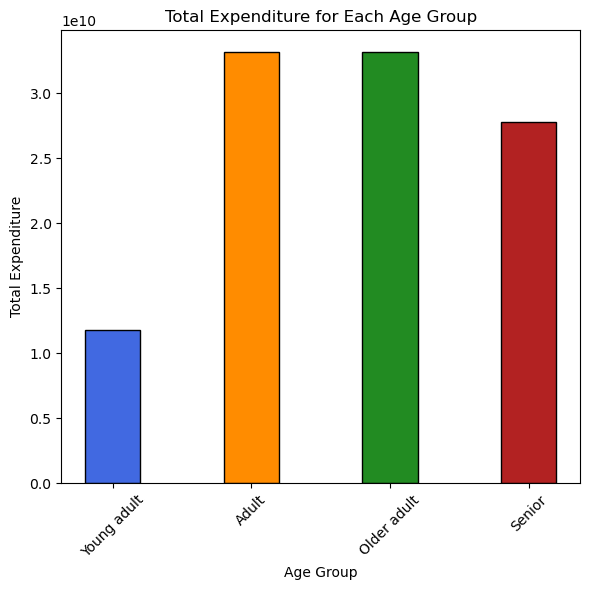

In [50]:
# Ensure age groups are in the desired order
age_groups_order = ['Young adult', 'Adult', 'Older adult', 'Senior']
total_expenditure_age_group['age_group'] = pd.Categorical(total_expenditure_age_group['age_group'], categories=age_groups_order, ordered=True)
total_expenditure_age_group = total_expenditure_age_group.sort_values('age_group')

# Define custom colors for age groups
colors = ['royalblue', 'darkorange', 'forestgreen', 'firebrick']

# Create a bar plot for each age group
plt.figure(figsize=(6, 6))
bar_total_expenditure_age = plt.bar(total_expenditure_age_group['age_group'], total_expenditure_age_group['total_expenditure'], width=0.4, edgecolor='black', color=colors)
plt.title('Total Expenditure for Each Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Expenditure')
plt.xticks(rotation=45)
plt.tight_layout()

bar_total_expenditure_age = plt.gcf()

In [51]:
# Export chart
bar_total_expenditure_age.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_total_expenditure_age.png'), dpi=300, bbox_inches='tight')

#### 2.7.2 Total expenditure per department for each age group

In [52]:
# Add department_name column to dataframe useing data mapping

# Define mapping from department_id to department_name
department_mapping = {
    1: 'frozen',
    2: 'other', 
    3: 'bakery',
    4: 'produce',
    5: 'alcohol',
    6: 'international',
    7: 'beverages',
    8: 'pets',
    9: 'dry goods pasta',
    10: 'bulk',
    11: 'personal care',
    12: 'meat seafood',
    13: 'pantry',
    14: 'breakfast',
    15: 'canned goods',
    16: 'dairy eggs',
    17: 'household',
    18: 'babies',
    19: 'snacks',
    20: 'deli',
    21: 'missing'
}

# Create the department_name column based on the mapping
instacart['department_name'] = instacart['department_id'].map(department_mapping)

In [53]:
# Group by age group and department_name, calculate the total expenditure
total_expenditure_by_age_dept = instacart.groupby(['age_group', 'department_name'])['total_expenditure'].sum().unstack(fill_value=0)

In [54]:
total_expenditure_by_age_dept

department_name,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
age_group,,,,,,,,,,,,,,,,,,,,,
Adult,101949814.6,575935679.6,1.252003e+09,2.529766e+09,732182738.0,38623737.1,1.076200e+09,5.776997e+09,1.110460e+09,884306260.8,...,635542025.5,276288396.5,705940872.8,60802260.9,33192875.6,1.838195e+09,388108413.1,83916010.7,9.927096e+09,2.991966e+09
Older adult,102691186.7,589678976.1,1.239977e+09,2.633291e+09,740776055.4,37392252.6,1.054987e+09,5.752030e+09,1.116380e+09,875623256.3,...,636867174.5,265635666.2,698437163.0,62348610.2,33495336.1,1.839555e+09,399774801.5,82668459.4,9.858314e+09,2.992105e+09
Senior,73998916.9,451230544.9,1.047152e+09,2.159001e+09,600705429.0,33201996.2,8.886565e+08,4.796643e+09,9.163552e+08,744620784.5,...,560211601.0,226562220.0,608605709.9,48721880.0,25757136.3,1.541686e+09,323523952.6,83637910.3,8.353127e+09,2.487909e+09
Young adult,42101157.3,205669576.3,4.397319e+08,8.786728e+08,269425637.6,14525170.0,3.810703e+08,2.078731e+09,3.832371e+08,319313497.8,...,226336277.8,99450809.0,256860681.5,22927265.3,12280435.2,6.551484e+08,135164326.4,38602102.3,3.507560e+09,1.026801e+09


In [55]:
# Transpose the DataFrame to switch rows and columns
total_expenditure_by_dept_age = total_expenditure_by_age_dept.T

In [56]:
total_expenditure_by_dept_age

age_group,Adult,Older adult,Senior,Young adult
department_name,,,,
alcohol,1.019498e+08,1.026912e+08,7.399892e+07,4.210116e+07
babies,5.759357e+08,5.896790e+08,4.512305e+08,2.056696e+08
bakery,1.252003e+09,1.239977e+09,1.047152e+09,4.397319e+08
beverages,2.529766e+09,2.633291e+09,2.159001e+09,8.786728e+08
breakfast,7.321827e+08,7.407761e+08,6.007054e+08,2.694256e+08
bulk,3.862374e+07,3.739225e+07,3.320200e+07,1.452517e+07
canned goods,1.076200e+09,1.054987e+09,8.886565e+08,3.810703e+08
dairy eggs,5.776997e+09,5.752030e+09,4.796643e+09,2.078731e+09
deli,1.110460e+09,1.116380e+09,9.163552e+08,3.832371e+08


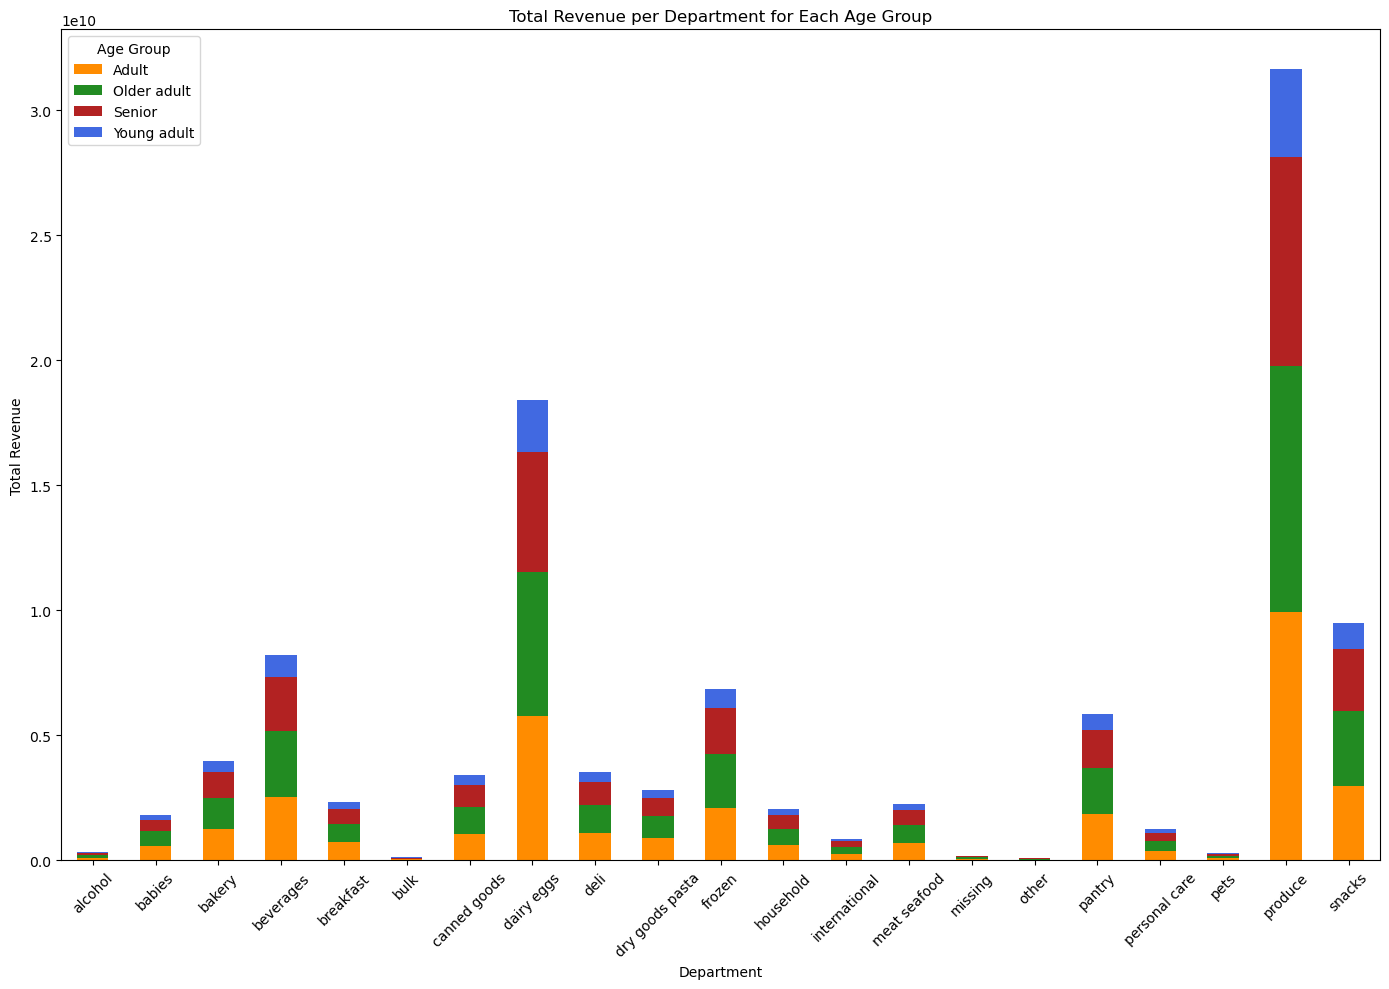

In [57]:
# Create custom colors for age groups
colors = {'Young adult': 'royalblue', 'Adult': 'darkorange', 'Older adult': 'forestgreen', 'Senior': 'firebrick'}

# Create a bar plot for each age group
total_expenditure_by_dept_age.plot(kind='bar', stacked=True, figsize=(14, 10), color=[colors[group] for group in total_expenditure_by_dept_age.columns])

plt.title('Total Revenue per Department for Each Age Group')
plt.xlabel('Department')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.tight_layout()

bar_total_revenue_age_department = plt.gcf()

In [58]:
# Export chart
bar_total_revenue_age_department.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_total_revenue_age_department.png'), dpi=300, bbox_inches='tight')

#### 2.7.3 Total expenditure per department for each income group

In [59]:
# Group by age group and department_name, calculate the total expenditure
total_expenditure_by_income_dept = instacart.groupby(['income_group', 'department_name'])['total_expenditure'].sum().unstack(fill_value=0)

In [60]:
# Transpose the DataFrame to switch rows and columns
total_expenditure_by_dept_income = total_expenditure_by_income_dept.T

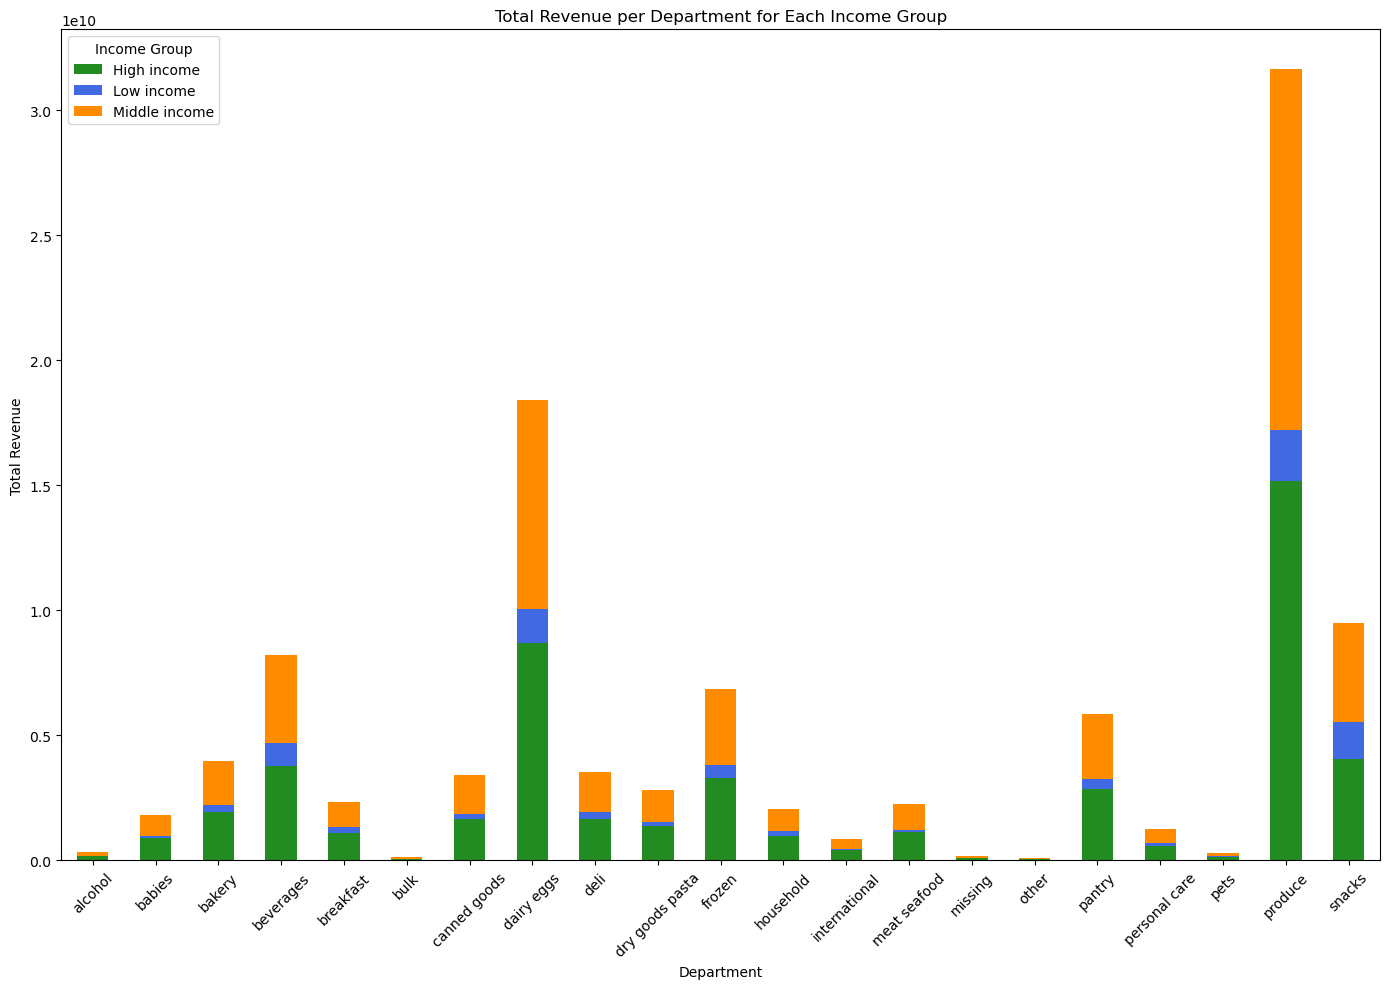

In [61]:
# Create custom colors for income groups
colors = {'Low income': 'royalblue', 'Middle income': 'darkorange', 'High income': 'forestgreen'}

# Create a bar plot for each age group
total_expenditure_by_dept_income.plot(kind='bar', stacked=True, figsize=(14, 10), color=[colors[group] for group in total_expenditure_by_dept_income.columns])

plt.title('Total Revenue per Department for Each Income Group')
plt.xlabel('Department')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.legend(title='Income Group')
plt.tight_layout()

bar_total_revenue_income_department = plt.gcf()

In [62]:
# Export chart
bar_total_revenue_income_department.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_total_revenue_income_department.png'), dpi=300, bbox_inches='tight')

#### 2.7.4 Total expenditure by family status

In [63]:
total_expenditure_family_status = instacart.groupby('family_status')['total_expenditure'].sum().reset_index()

In [64]:
total_expenditure_family_status

,family_status,total_expenditure
0,divorced/widowed,9.156158e+09
1,living with parents and siblings,5.124290e+09
2,married,7.419063e+10
3,single,1.737604e+10


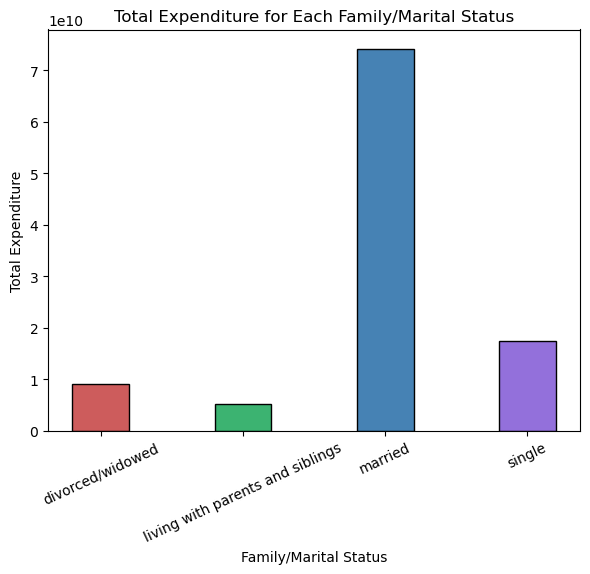

In [65]:
# Define custom colors for age groups
colors = ['indianred', 'mediumseagreen', 'steelblue', 'mediumpurple']

# Create a bar plot for each age group
plt.figure(figsize=(6, 6))
bar_total_expenditure_family_status = plt.bar(total_expenditure_family_status['family_status'], total_expenditure_family_status['total_expenditure'], width=0.4, edgecolor='black', color=colors)
plt.title('Total Expenditure for Each Family/Marital Status')
plt.xlabel('Family/Marital Status')
plt.ylabel('Total Expenditure')
plt.xticks(rotation=25)
plt.tight_layout()

bar_total_expenditure_family_status = plt.gcf()

In [66]:
# Export chart
bar_total_expenditure_family_status.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_total_expenditure_family_status.png'), dpi=300, bbox_inches='tight')

#### 2.7.5 Total expenditure per department for each family status

In [67]:
# Group by family status and department_name, calculate the total expenditure
total_expenditure_by_fam_stat_dept = instacart.groupby(['family_status', 'department_name'])['total_expenditure'].sum().unstack(fill_value=0)

In [68]:
# Transpose the DataFrame to switch rows and columns
total_expenditure_by_dept_fam_stat = total_expenditure_by_fam_stat_dept.T

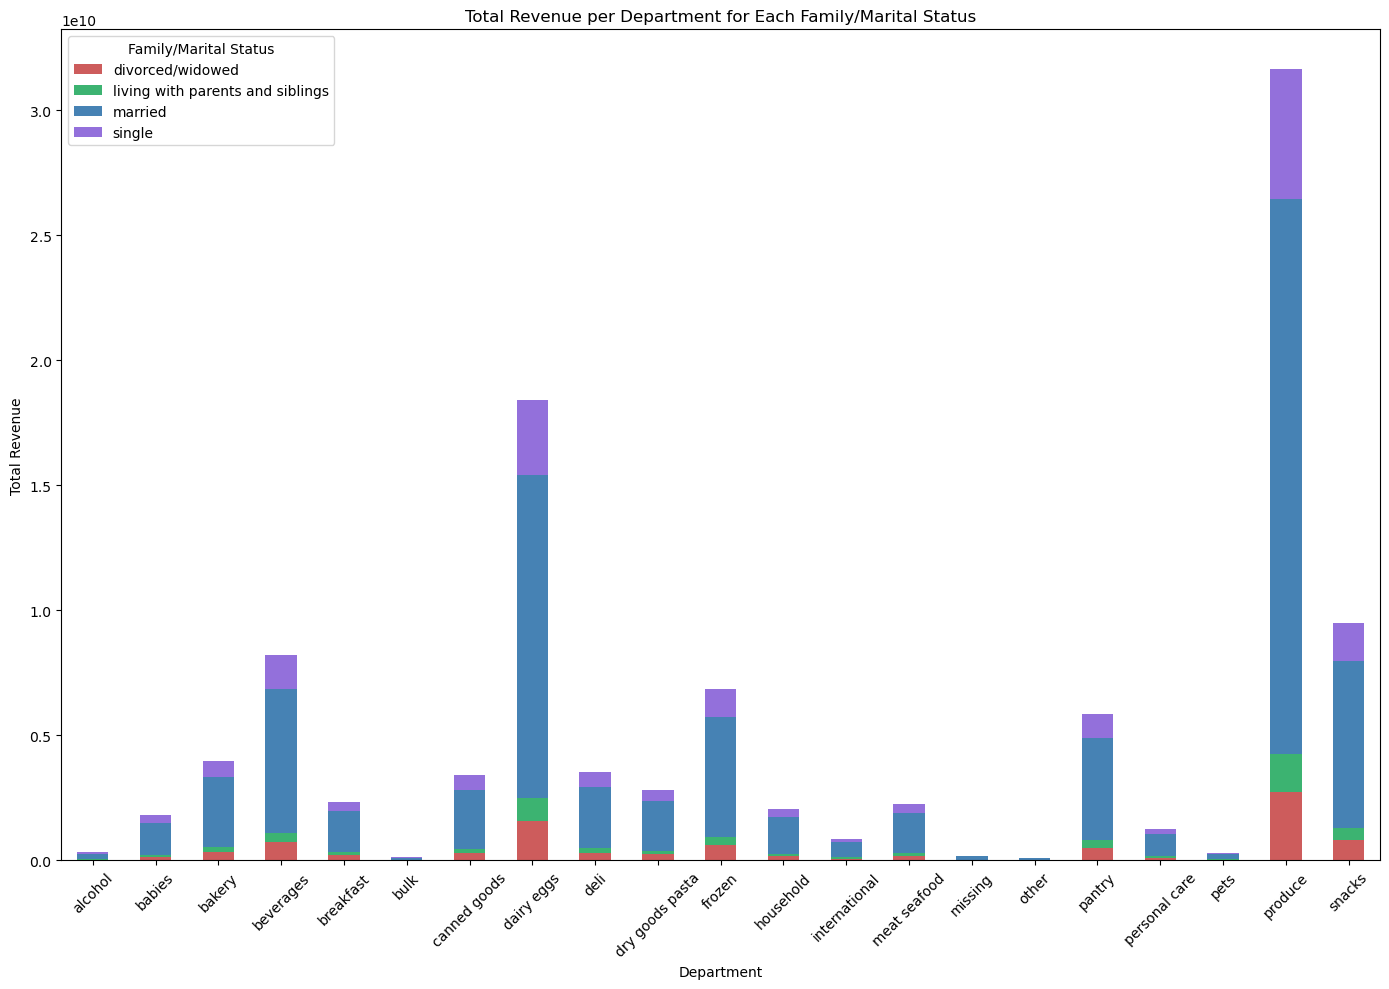

In [69]:
# Create custom colors for income groups
colors = {'divorced/widowed': 'indianred', 'living with parents and siblings': 'mediumseagreen', 'married': 'steelblue', 'single': 'mediumpurple'}

# Create a bar plot for each age group
total_expenditure_by_dept_fam_stat.plot(kind='bar', stacked=True, figsize=(14, 10), color=[colors[group] for group in total_expenditure_by_dept_fam_stat.columns])

plt.title('Total Revenue per Department for Each Family/Marital Status')
plt.xlabel('Department')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.legend(title='Family/Marital Status')
plt.tight_layout()

bar_total_revenue_family_status_department = plt.gcf()

In [70]:
# Export chart
bar_total_revenue_family_status_department.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_total_revenue_family_status_department.png'), dpi=300, bbox_inches='tight')

### 2.8 Ordering Habits for Customer Profiles

#### 2.8.1 Average Order Price by Customer Profile

In [122]:
# Calculate the average price of orders for each customer profile
average_order_price = instacart.groupby('customer_profile')['prices'].mean().reset_index()
average_order_price.columns = ['Customer Profile', 'Average Order Price']

print(average_order_price)

                                   Customer Profile  Average Order Price
0                   divorced/widowed, No dependents             7.801014
1  living with parents and siblings, Has dependents             7.800604
2                           married, Has dependents             7.790278
3                             single, No dependents             7.783597


#### 2.8.2 Top products ordered by each customer profile

In [225]:
# Count the occurrences of each department within each customer profile
product_preferences = instacart.groupby(['customer_profile', 'product_name']).size().reset_index(name='counts')

# Get the top products for each customer profile
top_products = product_preferences.groupby('customer_profile').apply(lambda x: x.nlargest(5, 'counts')).reset_index(drop=True)

C:\Users\ashle\AppData\Local\Temp\ipykernel_22680\3899006228.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  product_preferences = instacart.groupby(['customer_profile', 'product_name']).size().reset_index(name='counts')
C:\Users\ashle\AppData\Local\Temp\ipykernel_22680\3899006228.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_products = product_preferences.groupby('customer_profile').apply(lambda x: x.nlargest(5, 'counts')).reset_index(drop=True)
C:\Users\ashle\AppData\Local\Temp\ipykernel_22680\3899006228.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This be

In [227]:
top_products.to_clipboard()

#### 2.8.3 Preferred order times and days of the week by each customer profile

C:\Users\ashle\AppData\Local\Temp\ipykernel_22680\3734677283.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  order_day = instacart.groupby(['customer_profile', 'order_day_of_week']).size().unstack().fillna(0)


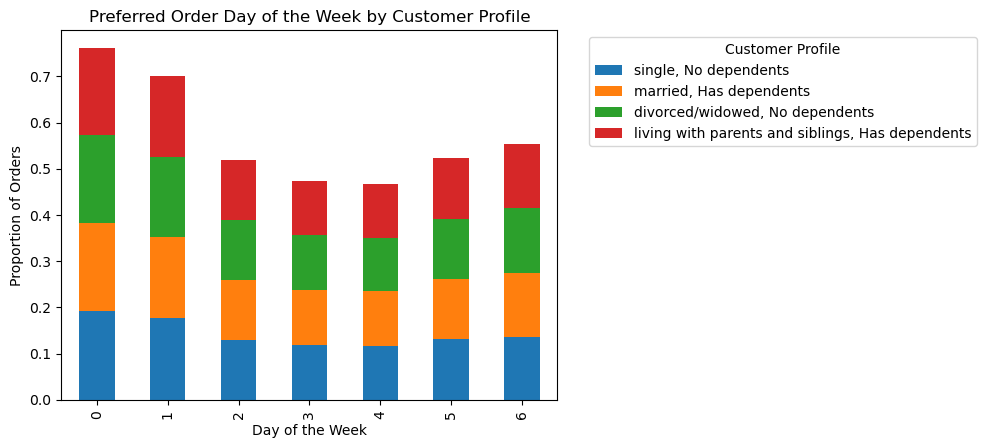

In [140]:
# Ensure 'customer_profile' is a categorical column with the specified order
customer_profile_order = ['single, No dependents', 'married, Has dependents', 'divorced/widowed, No dependents', 'living with parents and siblings, Has dependents']
instacart['customer_profile'] = pd.Categorical(instacart['customer_profile'], categories=customer_profile_order, ordered=True)

# Calculate the preferred order day of the week for each customer profile
order_day = instacart.groupby(['customer_profile', 'order_day_of_week']).size().unstack().fillna(0)
order_day = order_day.div(order_day.sum(axis=1), axis=0)

# Plotting preferred order day of the week
ax = order_day.T.plot(kind='bar', stacked=True)
plt.title('Preferred Order Day of the Week by Customer Profile')
plt.xlabel('Day of the Week')
plt.ylabel('Proportion of Orders')
plt.legend(title='Customer Profile', bbox_to_anchor=(1.05, 1.0), loc='upper left')

bar_order_day_customer_profile = plt.gcf()

In [142]:
# Export chart
bar_order_day_customer_profile.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_order_day_customer_profile.png'), dpi=300, bbox_inches='tight')

C:\Users\ashle\AppData\Local\Temp\ipykernel_22680\4073535821.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  order_hour = instacart.groupby(['customer_profile', 'order_hour_of_day']).size().unstack().fillna(0)


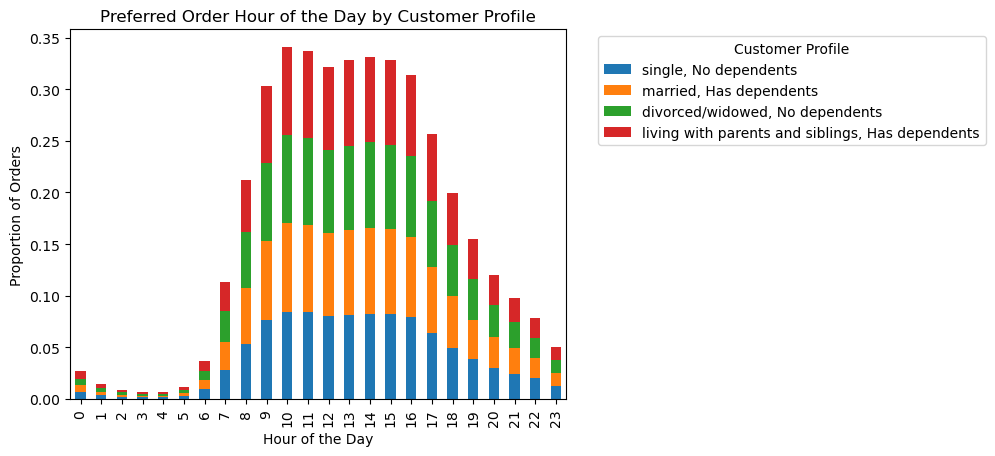

In [144]:
# Ensure 'customer_profile' is a categorical column with the specified order
customer_profile_order = ['single, No dependents', 'married, Has dependents', 'divorced/widowed, No dependents', 'living with parents and siblings, Has dependents']
instacart['customer_profile'] = pd.Categorical(instacart['customer_profile'], categories=customer_profile_order, ordered=True)

# Calculate the preferred order hour of the day for each customer profile
order_hour = instacart.groupby(['customer_profile', 'order_hour_of_day']).size().unstack().fillna(0)
order_hour = order_hour.div(order_hour.sum(axis=1), axis=0)

# Plotting preferred order hour of the day
order_hour.T.plot(kind='bar', stacked=True)
plt.title('Preferred Order Hour of the Day by Customer Profile')
plt.xlabel('Hour of the Day')
plt.ylabel('Proportion of Orders')
plt.legend(title='Customer Profile', bbox_to_anchor=(1.05, 1.0), loc='upper left')

bar_order_hour_customer_profile = plt.gcf()

In [146]:
# Export chart
bar_order_hour_customer_profile.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_order_hour_customer_profile.png'), dpi=300, bbox_inches='tight')

#### 2.8.4 Loyalty statuses for each customer profile

In [217]:
# Count the occurances of each loyalty_flog within each customer profile
loyalty_counts = instacart.groupby(['customer_profile', 'loyalty_flag']).size().unstack().fillna(0)

# Calculate the proportion of loyalty_flags for each custoemr profile
loyalty_proportions = loyalty_counts.div(loyalty_counts.sum(axis=1), axis=0)

C:\Users\ashle\AppData\Local\Temp\ipykernel_22680\1155922034.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loyalty_counts = instacart.groupby(['customer_profile', 'loyalty_flag']).size().unstack().fillna(0)


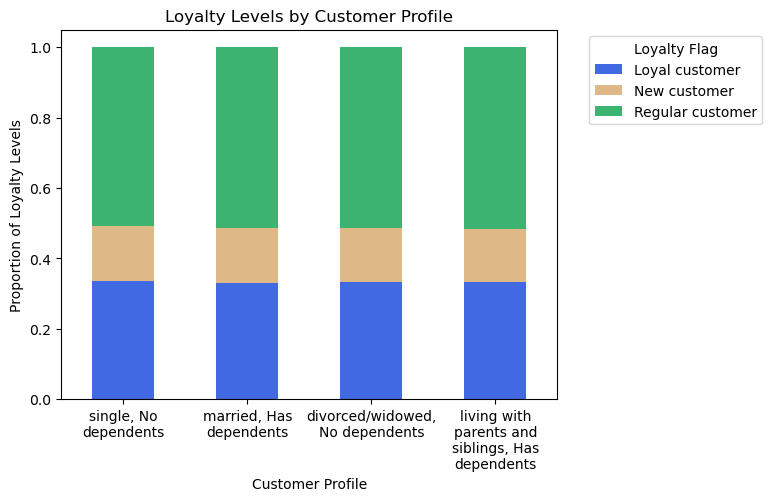

In [213]:
# Set custom coloring
colors = ['royalblue', 'burlywood', 'mediumseagreen']

# Function to wrap text
import textwrap

def wrap_labels(ax, max_char):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        wrapped_text = "\n".join(textwrap.wrap(text, max_char))
        labels.append(wrapped_text)
    ax.set_xticklabels(labels, rotation=0, ha='center')

# Create stacked bar chart
ax = loyalty_proportions.plot(kind='bar', stacked=True, color=colors)
plt.title('Loyalty Levels by Customer Profile')
plt.xlabel('Customer Profile')
plt.ylabel('Proportion of Loyalty Levels')
plt.legend(title='Loyalty Flag', bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Wrap x-axis labels to a maximum of 10 characters per line
wrap_labels(ax, 17)

stackedbar_loyalty_customer_profile = plt.gcf()

In [215]:
# Export chart
stackedbar_loyalty_customer_profile.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stackedbar_loyalty_customer_profile.png'), dpi=300, bbox_inches='tight')

In [240]:
instacart['price_label'].nunique()

3

In [238]:
instacart['product_id'].nunique()

49628

In [246]:
# Count unique product_id within each price_label
unique_product_counts = instacart.groupby('price_label')['product_id'].nunique()

In [248]:
unique_product_counts

price_label
High-range product      547
Low-range product     15866
Mid-range product     32802
Name: product_id, dtype: int64

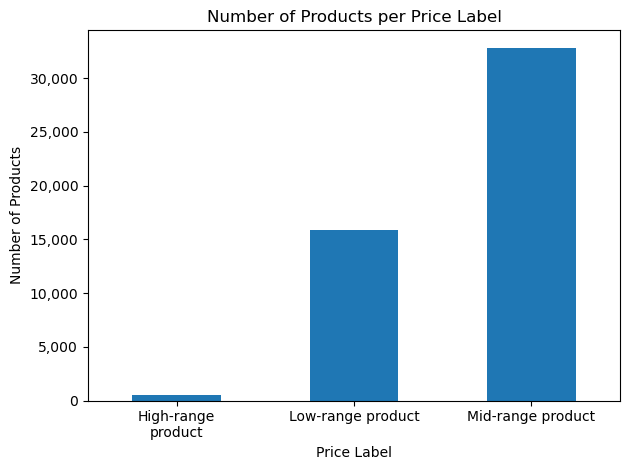

In [254]:
# Create a bar chart showing the number of products in each price_label category
ax = unique_product_counts.plot.bar()

plt.title('Number of Products per Price Label')
plt.xlabel('Price Label')
plt.ylabel('Number of Products')

# Format y-axis values
def value_formatter(x, pos):
    return f'{x:,.0f}'
plt.gca().yaxis.set_major_formatter(FuncFormatter(value_formatter))

# Wrap text labels
labels = [textwrap.fill(label, width=17) for label in unique_product_counts.index]
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=0, ha='center')

plt.tight_layout()

bar_price_label_distribution = plt.gcf()

In [256]:
# Export chart
bar_price_label_distribution.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_price_label_distribution.png'), dpi=300, bbox_inches='tight')

## 3. Export Data

In [229]:
# Export Final Dataset
instacart.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_final.pkl'))